# Testing Objectdetection (Computervision)
Eerst ga ik hier wat rondspelen om Open CV wat te leren kennen  
Hiervoor ga ik gebruik maken van de labo's van Computervisie

In [1]:
import cv2, os, math
from matplotlib import pyplot as plt
import numpy as np

images = [f for f in os.listdir("images") if os.path.isfile(os.path.join("images", f))]
print(images)

['droogkast.jpg', 'keukenweegschaal.jpg', 'microwave.jpg', 'wasmachine.jpg', 'wekker.jpg']


## Some general functions

- `print_pictures()`
- `print_overview()`
- `pipeline_operations()`

In [2]:
def print_pictures(pictures,titles,cmap):
    x,y = len(pictures[0]),len(pictures)
    
    for j in range(y):
        fig,ax= plt.subplots(1,x)
        fig.tight_layout()
        for i in range(x):
            ax[i].axis('off')
            ax[i].imshow(pictures[j][i],cmap=cmap[j][i])
            ax[i].set_title(titles[j][i])            
        fig.show()
        
def print_overview(pictures,titles,cmap):
    x,y = len(pictures[0]),len(pictures)
    fig,ax= plt.subplots(y,x)
    fig.tight_layout()
    
    for j in range(y):
        for i in range(x):
            ax[i,j].axis('off')
            ax[i,j].imshow(pictures[j][i],cmap=cmap[j][i])
            ax[i,j].set_title(titles[j][i])            
        fig.show()
       
def pipeline_operations(startset,operations):
    #ASSUME operation RETURNS SHAPE (lists,ROW,COLUMN)
    #ASSUME startset HAS SAME SHAPE
    for op in operations:
        res = op(startset[0][0])
        for i in range(len(startset)):
            startset[i].extend(res[i])
    return startset

In [3]:
def get_img(photo):
    img = cv2.imread(os.path.join("images", photo))

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

    return [[img_rgb,img_gray,img_blur]],\
           [["RGB","GRAY","BLUR"]],\
           [["viridis","gray","gray"]]

## Edge Detection

In [4]:
def do_sobel(imgs:list):
    rgb_x = cv2.Sobel(imgs[0], cv2.CV_64F,1,0, 5)
    rgb_y = cv2.Sobel(imgs[0], cv2.CV_64F,0,1, 5)
    gray_x = cv2.Sobel(imgs[1], cv2.CV_64F,1,0, 5)
    gray_y = cv2.Sobel(imgs[1], cv2.CV_64F,0,1, 5)
    blur_x = cv2.Sobel(imgs[2], cv2.CV_64F,1,0, 5)
    blur_y = cv2.Sobel(imgs[2], cv2.CV_64F,0,1, 5)
    
    return [[rgb_x,gray_x,blur_x],[rgb_y,gray_y,blur_y]],\
           [["","SOBEL X",""]    ,["","SOBEL Y",""]],\
           [["viridis","gray","gray"],["viridis","gray","gray"]] 

In [5]:
def do_canny(imgs:list, th1=100, th2=200):
    rgb = cv2.Canny(imgs[0],th1,th2)
    gray = cv2.Canny(imgs[1],th1,th2)
    blur = cv2.Canny(imgs[2],th1,th2)
    
    return [[rgb,gray,blur]],\
           [["","CANNY",""]],\
           [["gray","gray","gray"]]

Picture: droogkast.jpg


C:\Users\hp\AppData\Local\Temp\ipykernel_13936\1227278429.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-950.0..976.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-983.0..915.0].


Picture: keukenweegschaal.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-492.0..647.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-394.0..375.0].


Picture: microwave.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-527.0..489.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-504.0..496.0].


Picture: wasmachine.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-683.0..831.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-592.0..690.0].


Picture: wekker.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-803.0..842.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-606.0..639.0].


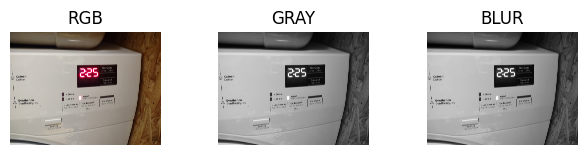

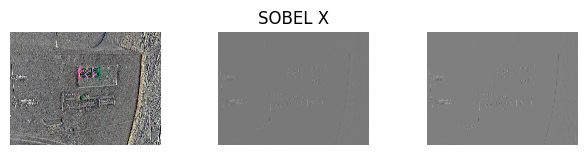

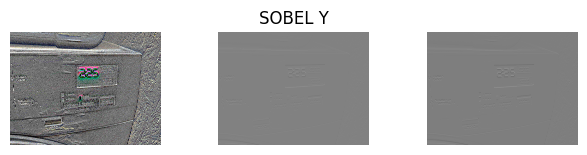

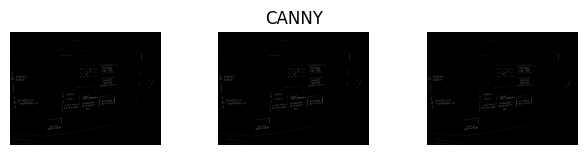

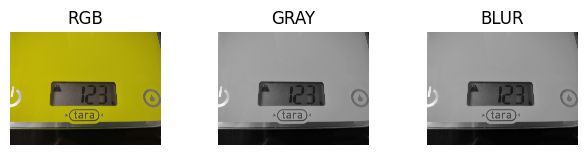

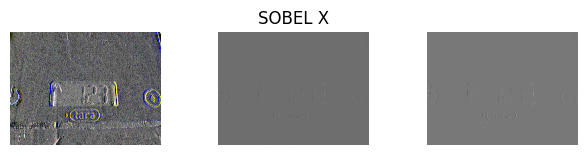

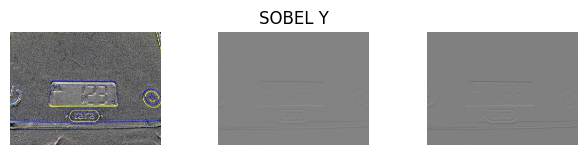

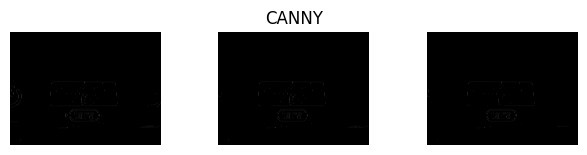

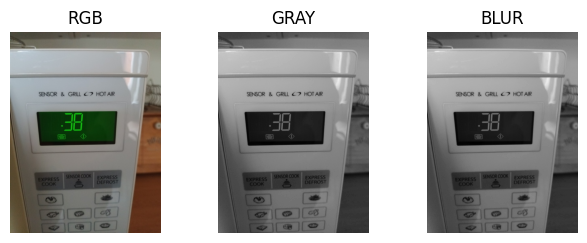

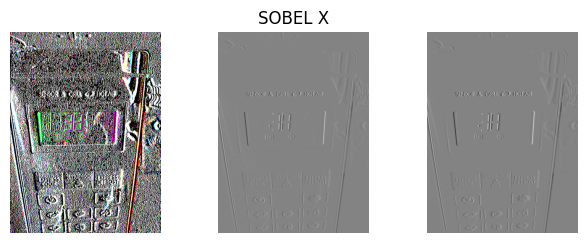

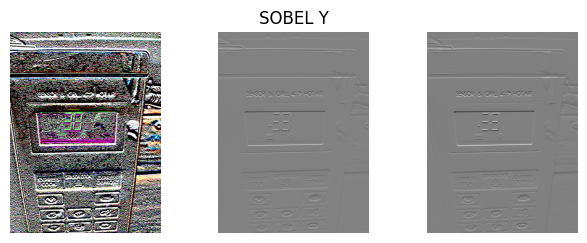

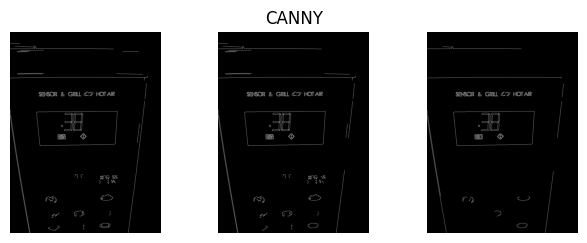

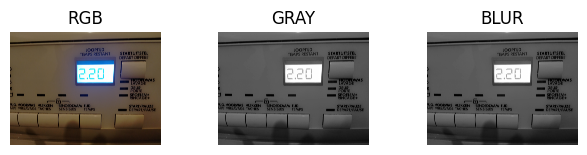

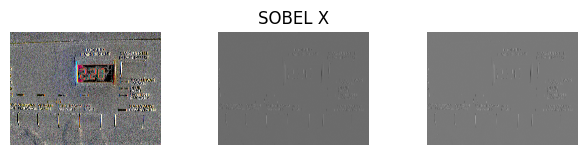

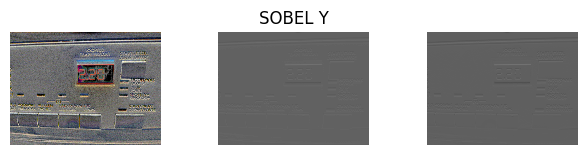

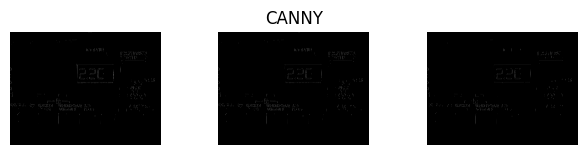

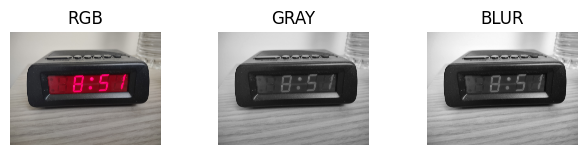

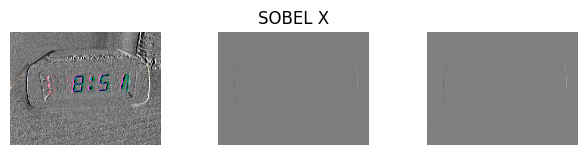

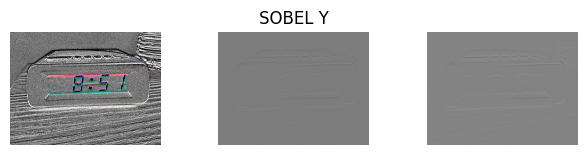

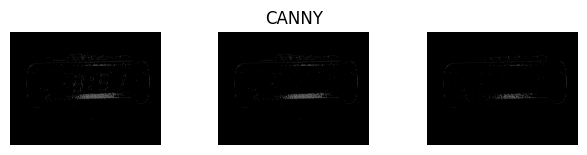

In [23]:
for pic in images:
    print(f"Picture: {pic}")
    result = pipeline_operations(get_img(pic),[do_sobel,do_canny])
    print_pictures(result[0],result[1],result[2])

C:\Users\hp\AppData\Local\Temp\ipykernel_13936\1227278429.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


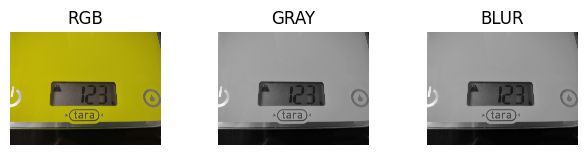

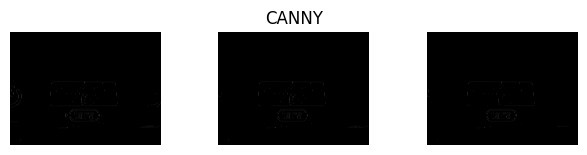

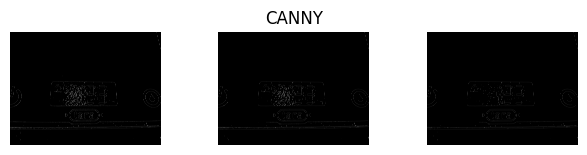

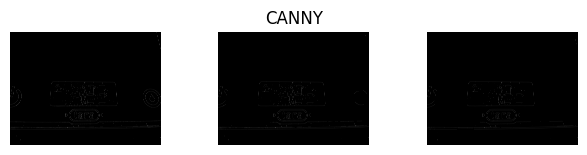

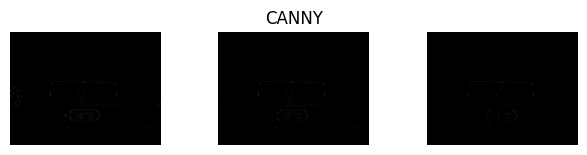

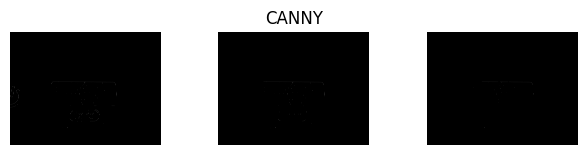

In [7]:
from functools import partial
cannyD = partial(do_canny, th1=25, th2 = 75)
cannyA = partial(do_canny, th1=50, th2 = 100)
cannyB = partial(do_canny, th1=150, th2 = 200)
cannyC = partial(do_canny, th1=200, th2 = 250)


result = pipeline_operations(get_img(images[1]),[do_canny,cannyD,cannyA,cannyB,cannyC])
print_pictures(result[0],result[1],result[2])

## SegoDoc

Ik heb SegoDoc uitgetest. Het werkt indien de juist crop methodes etc worden doorgegeven.

## Line fitting


In [21]:
cann = do_canny(get_img(images[3])[0][0],th1=50,th2=200)[0][0][0]
lines = cv2.HoughLines(cann, 1, np.pi / 180, 150, None, 0, 0)

cdst = cv2.cvtColor(cann, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
            
linesP = cv2.HoughLinesP(cann, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

C:\Users\hp\AppData\Local\Temp\ipykernel_13936\1227278429.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


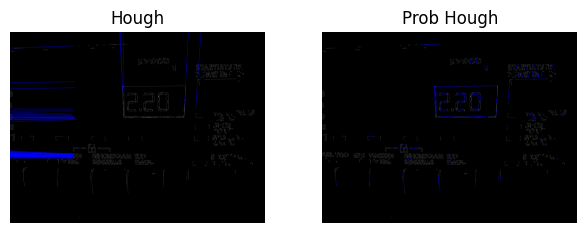

In [22]:
print_pictures([[cdst,cdstP]],[["Hough","Prob Hough"]],[["viridis","viridis"]])

## Wrm line fitting niet werkt

TODO: beschrijven
